# Body Class

The `Body` Class within SORA was created to handle the information about the Solar System object. The online documentation <a href=https://sora.readthedocs.io/>here</a> contains the details about every step.  

This Jupyter-Notebook was designed as a tutorial for how to work with the `Body` Class. Any further question, please contact the core team: Altair Ramos Gomes Júnior, Bruno Eduardo Morgado, Gustavo Benedetti Rossi, and Rodrigo Carlos Boufleur.

**The `Body` Docstring was designed to help the users. Also, each function has its Docstring containing its main purpose and the needed parameters (physical description and formats). Please, do not hesitate to use it.**

## 0. Index

1. [Instantiating a Body object](#section_1)
2. [Body Physical Attributes](#section_2)
3. [Ephemeris](#section_3)
4. [Pole Position Angle and Aperture Angle](#section_4)
5. [Apparent Magnitude](#section_5)
6. [The Ephemeris Classes](#section_6)
7. [The frame attribute](#section_7)
8. [The shape attribute](#section_8)

In [1]:
## import the Body Class
from sora.body import Body

## To facilitate, sora allows to import Body directly from the root
from sora import Body

SORA version: 0.3


<a id="section_1"></a>

## 1. Instantiating a Body object

A Solar System Body have a lot of parameters that characterizes itself. The SORA `Body` Class is able to download these parameter from the JPL <a href="https://ssd.jpl.nasa.gov/sbdb.cgi">Small Body DataBase</a>. For that, a name should be given to search the object.

In [2]:
Body?

Init signature: Body(name, database='auto', **kwargs)
Docstring:     
Class that contains and manages the information of the body.

Attributes
----------
name : `str`, required
    The name of the object. It can be the used `spkid` or `designation
    number` to query the SBDB (Small-Body DataBase). In this case, the name
    is case insensitive.

database : `str`, optional, default='auto'
    The database to query the object. It can be ``satdb`` for our temporary
    hardcoded satellite database, or ``'sbdb'`` to query on the SBDB. If
    database is set as ``auto`` it will try first with ``satdb``,
    then ``sbdb``. If the user wants to use their own information,
    database must be given as ``None``. In this case, `spkid` parameter
    must be given.

ephem : `sora.EphemKernel`, `sora.EphemHorizons`, `sora.EphemJPL`, `sora.EphemPlanete`
    An Ephem Class that contains information about the ephemeris. It can be
    "horizons" to automatically defined an EphemHorizons object or a l

In [3]:
ceres = Body(name='Ceres')

Obtaining data for Ceres from SBDB


In [4]:
print(ceres)

###############################################################################
                               1 Ceres (A801 AA)                               
###############################################################################
Object Orbital Class: Main-belt Asteroid
Spectral Type:
    SMASS: C  [Reference: EAR-A-5-DDR-TAXONOMY-V4.0]
    Tholen: G [Reference: EAR-A-5-DDR-TAXONOMY-V4.0]
       Linear, generally featureless spectra. Differences in UV absorption features and presence/absence of narrow absorption feature near 0.7 μm.
Discovered 1801-Jan-01 by Piazzi, G. at Palermo

Physical parameters:
Diameter:
    939.4 +/- 0.2 km
    Reference: Nature vol. 537, pp515-517 (22 September 2016), 
Mass:
    9.3835e+20 +/- 1.3485e+16 kg
    Reference: Nature vol. 537, pp515-517 (22 September 2016), 
Density:
    2.162 +/- 0.008 g / cm3
    Reference: Nature vol. 537, pp515-517 (22 September 2016), 
Rotation:
    9.0742 +/- 1e-06 h
    Reference: Nature vol. 537, pp515-517 (22 Sep

Other parameters that are interpreted by the `Body` Class are downloaded from the SBDB. They are accessed vi the attribute `Body.meta_sbdb`

In [5]:
ceres.meta_sbdb

OrderedDict([('phys_par',
              OrderedDict([('H', 3.33),
                           ('H_sig', None),
                           ('H_ref', 'MPO691494'),
                           ('H_note', 'IRAS observations used: 15'),
                           ('G', 0.12),
                           ('G_sig', None),
                           ('G_ref', 'PDS3 (MPC 17257)'),
                           ('G_note', 'Fit'),
                           ('diameter', <Quantity 939.4 km>),
                           ('diameter_sig', <Quantity 0.2 km>),
                           ('diameter_ref',
                            'Nature vol. 537, pp515-517 (22 September 2016)'),
                           ('diameter_note', None),
                           ('extent', '964.4 x 964.2 x 891.8'),
                           ('extent_sig', '0.2 x 0.2 x 0.2'),
                           ('extent_ref',
                            'Nature vol. 537, pp515-517 (22 September 2016)'),
                           ('exten

The SORA team also created a hardcoded database with planetary satellites and planets to overcome the missing of these data on the SBDB. It is an interim solution and will be removed when a more reliable database is implemented.

In [6]:
himalia = Body(name='Himalia', database='satdb')
print(himalia)

###############################################################################
                                    Himalia                                    
###############################################################################
Object Orbital Class: Natural Satellite


Physical parameters:
Diameter:
    139.6 +/- 1.7 km
    Reference: Grav et al. (2015). AJ 809(1):3, 
Mass:
    4.1952e+18 +/- 5.9931e+17 kg
    Reference: Emelyanov (2005). A&A 438(3):L33-L36, 
Rotation:
    7.7819 +/- 0.0005 h
    Reference: Pilcher et al. (2012). Icarus 219(2):741-742, 
Absolute Magnitude:
    8 +/- 0.01 mag
    Reference: Rettig et al. (2001). Icarus 154(2):313-320, 
Phase Slope:
    0.1 +/- 0.15 
    Reference: , 
Albedo:
    0.057 +/- 0.008 
    Reference: Grav et al. (2015). AJ 809(1):3, 

Ellipsoid: 69.8 x 69.8 x 69.8

----------- Ephemeris -----------

EphemHorizons: Ephemeris are downloaded from Horizons website (SPKID=506)
Ephem Error: RA*cosDEC: 0.000 arcsec; DEC: 0.000 arcsec
Offs

Finally, the user can also define a `Body` object without any database. In this case, it is required to define the parameters: `[name, spkid, database=None, orbit_class]`

In [7]:
elara = Body(name='Elara', database=None, spkid=507, orbit_class='satellite')
print(elara)


###############################################################################
                                     Elara                                     
###############################################################################
Object Orbital Class: Natural Satellite


Physical parameters:

----------- Ephemeris -----------

EphemHorizons: Ephemeris are downloaded from Horizons website (SPKID=507)
Ephem Error: RA*cosDEC: 0.000 arcsec; DEC: 0.000 arcsec
Offset applied: RA*cosDEC: 0.0000 arcsec; DEC: 0.0000 arcsec




<a id="section_2"></a>

## 2. Body Physical Attributes

The parameters shown in the print can be accessed by its attribute name.

These paremeter also have uncertainty and reference, which may be edited

In [8]:
ceres.diameter

<PhysicalData 939.4 km>

In [9]:
ceres.diameter.uncertainty

<Quantity 0.2 km>

In [10]:
ceres.diameter.reference

'Nature vol. 537, pp515-517 (22 September 2016)'

In [11]:
print(ceres.diameter)

Diameter:
    939.4 +/- 0.2 km
    Reference: Nature vol. 537, pp515-517 (22 September 2016), 



### 2.1. Editing Body Attributes

To edit a parameter, simply redefine the attribute. If the core value is edited, the uncertainty is redefined to "0", and the reference to "user"

In [12]:
ceres.diameter = 972

In [13]:
print(ceres.diameter)

Diameter:
    972 +/- 0 km
    Reference: User, 



To correct the uncertainty and reference, just redefine them

In [14]:
ceres.diameter.uncertainty = 6
ceres.diameter.reference = "Gomes-Júnior et al. (2015), MNRAS 451(3), 2295-2302"
ceres.diameter.notes = "Equatorial Diameter"

In [15]:
print(ceres.diameter)

Diameter:
    972 +/- 6 km
    Reference: Gomes-Júnior et al. (2015), MNRAS 451(3), 2295-2302, Equatorial Diameter



Finally, if you want to edit all the values of a single parameter directly, you must use the `PhysicalData` Class located in sora.body

In [16]:
from sora.body import PhysicalData
import astropy.units as u
PhysicalData?

Init signature:
PhysicalData(
    name,
    value,
    uncertainty=0.0,
    reference='User',
    notes='',
    unit=Unit(dimensionless),
    raise_error=False,
)
Docstring:     
Defines PhysicalData with uncertainty, reference and notes.

Note
----
It inherits from astropy.units.quantity.Quantity().

Parameters
----------
name :`str`
    The name representing the corresponding physical parameter.

value : `int`, `float`, `str`, `~numpy.ndarray`, `astropy.quantity.Quantity`
    The numerical value of this quantity in the units given by unit.  If
    a `Quantity`  (or any other valid object with a ``unit`` attribute),
    creates a new `Quantity` object, converting to `unit` units as needed.
    If a string, it is converted to a number or `Quantity`, depending on
    whether a unit is present.

uncertainty : `int`, `float`, `str`, `~numpy.ndarray`, `astropy.quantity.Quantity`, default=0
    The numerical value of this quantity in the units given by unit.  If
    a `Quantity` (or any oth

In [17]:
ceres.diameter = PhysicalData(name='Diameter', value=972, uncertainty=6, reference="Gomes-Júnior et al. (2015), MNRAS 451(3), 2295-2302",
                              notes="Equatorial Radius", unit=u.km)
print(ceres.diameter)

Diameter:
    972 +/- 6 km
    Reference: Gomes-Júnior et al. (2015), MNRAS 451(3), 2295-2302, Equatorial Radius



Some parameters have direct relations when modified, for instance: diameter and radius; and GM and mass.

In [18]:
print(ceres.GM)
print(ceres.mass)

Standard Gravitational Parameter:
    62.628 +/- 0.0009 km3 / s2
    Reference: Nature vol. 537, pp515-517 (22 September 2016), 

Mass:
    9.3835e+20 +/- 1.3485e+16 kg
    Reference: Nature vol. 537, pp515-517 (22 September 2016), 



In [19]:
ceres.GM = 63
ceres.GM.uncertainty = 0.0010

In [20]:
print(ceres.GM)
print(ceres.mass)

Standard Gravitational Parameter:
    63 +/- 0.001 km3 / s2
    Reference: User, 

Mass:
    9.4392e+20 +/- 1.4983e+16 kg
    Reference: User, 



<a id="section_3"></a>

## 3. Ephemeris

An important feature of the body is its ephemeris. It is the ephemeris that will tell us te position of the object for a given time. It is necessary the `Body` object to have an Ephemeris when reducing an Occultation. The full description of the Ephemeris options are given at [Section 6](#section_6).

To add a ephemeris to a `Body` object, just given them as input or edit the ephem attribute:

In [21]:
# Giving the kernels directly using an EphemKernel object
chariklo = Body(name='Chariklo', ephem=['input/bsp/Chariklo.bsp', 'input/bsp/de438_small.bsp'])

Obtaining data for Chariklo from SBDB


In [22]:
chariklo = Body(name='Chariklo')
chariklo.ephem = ['input/bsp/Chariklo.bsp', 'input/bsp/de438_small.bsp']

Obtaining data for Chariklo from SBDB


In [23]:
print(chariklo)

###############################################################################
                          10199 Chariklo (1997 CU26)                           
###############################################################################
Object Orbital Class: Centaur
Spectral Type:
    SMASS: D  [Reference: EAR-A-5-DDR-TAXONOMY-V4.0]
       Relatively featureless spectrum with very steep red slope.
Discovered 1997-Feb-15 by Spacewatch at Kitt Peak

Physical parameters:
Diameter:
    302 +/- 30 km
    Reference: Earth, Moon, and Planets, v. 89, Issue 1, p. 117-134 (2002), 
Rotation:
    7.004 +/- 0 h
    Reference: LCDB (Rev. 2021-June); Warner et al., 2009, [Result based on less than full coverage, so that the period may be wrong by 30 percent or so.]  REFERENCE LIST:[Fornasier, S.; Lazzaro, D.; Alvarez-Candal, A.; Snodgrass, C.; et al. (2014) Astron. Astrophys. 568, L11.], [Leiva, R.; Sicardy, B.; Camargo, J.I.B.; Desmars, J.; et al. (2017) Astron. J. 154, A159.]
Absolute Magnitude:

In [24]:
# Using the ephemeris from Horizons with an EphemHorizons object
ceres = Body(name='Ceres', ephem='horizons')

Obtaining data for Ceres from SBDB


The ephemeris parameters can also be an `EphemKernel`, `EphemHorizons` or `EphemPlanete` objects given directly. Only `EphemPlanete` requires the ephemeris object being defined before associated to a `Body` object.

In [25]:
from sora import EphemKernel
ephem = EphemKernel(kernels=['input/bsp/Chariklo.bsp', 'input/bsp/de438_small.bsp'], spkid='2010199')
chariklo.ephem = ephem

For a full description of the Ephemeris objects, see [Section 6](#section_6)

<a id="section_4"></a>

## 4. Pole Position Angle and Aperture Angle

For a given time, and given pole coordinate, we are able to calculate the Pole Position Angle relative to the North pole in the ICRS and the Aperture Angle of the object pole coordinate. For this, it is necessary for the `Body` object to have pole coordinates and ephemeris.

In [26]:
ceres.get_pole_position_angle?

Signature: ceres.get_pole_position_angle(time, observer='geocenter')
Docstring:
Returns the pole position angle and the aperture angle relative to
the geocenter.

Parameters
----------
time : `str`, `astropy.time.Time`
    Time from which to calculate the position.
    It can be a string in the ISO format (yyyy-mm-dd hh:mm:ss.s) or an astropy Time object.

observer : `str`, `sora.Observer`, `sora.Spacecraft`
    IAU code of the observer (must be present in given list of kernels),
    a SORA observer object or a string: ['geocenter', 'barycenter']

Returns
-------
position_angle, aperture_angle : `float` array
    Position angle and aperture angle of the object's pole, in degrees.
File:      ~/Documentos/códigos/SORA/sora/body/core.py
Type:      method


In [27]:
ceres.pole.to_string('hmsdms')

'19h25m40.32s +66d45m50.4s'

In [28]:
pos_ang, ap_ang = ceres.get_pole_position_angle(time='2017-06-22 00:00:00')
print(pos_ang)
print(ap_ang)

348.5707051283039 deg
-2.5635901219177977 deg


<a id="section_5"></a>

## 5. Apparent Magnitude

The Body objectcs calculates the Apparent Magnitude of an object using the H and G given by the user. The equation is:

$\phi_0 = \exp(-3.33(\tan(0.5 phase)^{0.63}))$

$\phi_1 = \exp(-1.87(\tan(0.5 phase)^{1.22}))$

$apmag = H - 2.5\log10((1-G)\phi_0 + G\phi_1) + 5\log10(sundist*dist)$

It is Body object has the Absolute Magnitude (H), Phase Slope (G) and an ephemeris, the apparent magnitude will be calculated. Else, a query to the JPL Horizons web service will be made

In [29]:
print(ceres.H, ceres.G)

Absolute Magnitude:
    3.33 +/- 0 mag
    Reference: MPO691494, IRAS observations used: 15
 Phase Slope:
    0.12 +/- 0 
    Reference: PDS3 (MPC 17257), Fit



In [30]:
ceres.apparent_magnitude(time='2017-06-22 00:00:00')

9.011349951700899

In [31]:
print(chariklo.H, chariklo.G)

Absolute Magnitude:
    6.54 +/- 0 mag
    Reference: MPO691682, 
 


In [32]:
chariklo.apparent_magnitude(time='2017-06-22 00:00:00')

/home/altair/Documentos/códigos/SORA/sora/body/core.py:332: UserWarning: H and/or G is not defined for 10199 Chariklo. Searching into JPL Horizons service
  warnings.warn('H and/or G is not defined for {}. Searching into JPL Horizons service'.format(self.shortname))


18.489

When the apparent magnitude is downloaded from the Horizons service, usually the H and G parameters can be found. In this cases, the `Body` object stores these values for further use.

In [33]:
print(chariklo.H, chariklo.G)

Absolute Magnitude:
    6.54 +/- 0 mag
    Reference: JPL Horizons, 
 Phase Slope:
    0.15 +/- 0 
    Reference: JPL Horizons, 



In [34]:
chariklo.apparent_magnitude(time='2017-06-22 00:00:00')

18.489144139264898

<a id="section_6"></a>

## 6. The Ephemeris Classes

As stated above, there are 3 different types of `Ephemeris` Classes.

- `EphemPlanete` - Reads a file with a list of Geocentric coordinates and interpolates.
- `EphemHorizons` - Queries the JPL Horizons website and download ephemeris informations.
- `EphemKernel` - Reads the BSP files to calculate ephemeris.

Usually, the user will only need one of those. As shown in [Section 3](#section_3), the user can tell the body object the kernels for a `EphemKernel` object or the string 'horizons' for a `EphemHorizons` object. In this section we show the Ephemeris behave and if the user wants to use it directly without a `Body` object.

In [35]:
## import the Ephemeris Classes
from sora.ephem import EphemPlanete, EphemHorizons, EphemKernel

## To facilitate, sora allows to import Ephem directly from the sora package.
from sora import EphemPlanete, EphemHorizons, EphemKernel

### 6.1. Instantiating an EphemPlanete Object

In this case, a file must be given containing Julian Date, RA (in deg), DEC (in deg) and Distance (in AU), in this order, separated by an space. Please, look at the "ephem_phoebe_ph15_jd.txt" file for an example. Only the name of the object and the file with the ephemeris is required.

In [36]:
EphemPlanete?

Init signature: EphemPlanete(ephem, name=None, spkid=None, **kwargs)
Docstring:     
Class used to simulate former Fortran programs `ephem_planete` and
`fit_d2_ksi_eta`.

Attributes
----------
ephem : `file`, required
    Input file with JD (UTC), geocentric RA (deg), DEC (deg), and
    distance (AU).

name : `str`, optional, default=None
    Name of the object to search in the JPL database.

radius : `int`, `float`, optional, default: online database
    Object radius, in km.

error_ra : `int`, `float`, optional, default: online database
    Ephemeris RA*cosDEC error, in arcsec.

error_dec : `int`, `float`, optional, default: online database
    Ephemeris DEC error, in arcsec.

mass : `int`, `float`, optional. default=0
    Object mass, in kg.

H : `int`, `float`, optional, default=NaN
    Object absolute magnitude.

G : `int`, `float`, optional, default=NaN
    Object phase slope.
File:           ~/Documentos/códigos/SORA/sora/ephem/core.py
Type:           type
Subclasses:     


In [37]:
eph_pla = EphemPlanete(name='Phoebe', ephem='input/ascii/ephem_phoebe_ph15_jd.txt')

In [38]:
print(eph_pla)

----------- Ephemeris -----------

EphemPlanete: Valid from 2019-06-07 02:54:00.000 until 2019-06-07 04:54:00.000 (SPKID=)
Ephem Error: RA*cosDEC: 0.000 arcsec; DEC: 0.000 arcsec
Offset applied: RA*cosDEC: 0.0000 arcsec; DEC: 0.0000 arcsec



### 6.2. Instantiating an EphemHorizons Object

In this case, only the name of the object is required as this will be used to queries the JPL database. Another important keyword is the "id_type", which will be used to constrain the search of the object. For instance, if the name is "Europa" and the id_type is "smallbody" it looks the asteroid (52) Europa, while if id_type is "majorbody" it looks for the Jovian satellite J2 Europa. However, in some cases, there are still conflict name issue which solutions are being verified. A common solver is to use the IAU ID number in the name variable

In [39]:
EphemHorizons?

Init signature: EphemHorizons(name, id_type='smallbody', spkid=None, **kwargs)
Docstring:     
Obtains the ephemeris from Horizons/JPL service.

Note
----
Web tool URL: https://ssd.jpl.nasa.gov/horizons.cgi


Attributes
----------
name : `str`, required
    Name of the object to search in the JPL database.

id_type: `str`, default='smallbody'
    Type of object options: ``smallbody``, ``majorbody`` (planets but
    also anything that is not a small body), ``designation``, ``name``,
    ``asteroid_name``, ``comet_name``, ``id`` (Horizons id number), or
    ``smallbody`` (find the closest match under any id_type).

radius : `int`, `float`, default: online database
    Object radius, in km.

error_ra : `int`, `float`, default: online database
    Ephemeris RA*cosDEC error, in arcsec.

error_dec : `int`, `float`, default: online database
    Ephemeris DEC error, in arcsec.

mass : `int`, `float`, default=0
    Object mass, in kg.

H : `int`, `float`, default=NaN
    Object absolute magnitu

In [40]:
eph_hor = EphemHorizons(name='Chariklo')

In [41]:
print(eph_hor)

----------- Ephemeris -----------

EphemHorizons: Ephemeris are downloaded from Horizons website (SPKID=)
Ephem Error: RA*cosDEC: 0.000 arcsec; DEC: 0.000 arcsec
Offset applied: RA*cosDEC: 0.0000 arcsec; DEC: 0.0000 arcsec



### 6.3. Instantiating an EphemKernel Object

This is the most effective `Ephemeris` Class. Since it reads the BSP files directly, it is faster. What is needed here is the spkid of the object, and the list of kernels. Even if only one kernel is passed, it must be a list.

In [42]:
EphemKernel?

Init signature: EphemKernel(kernels, spkid, name=None, **kwargs)
Docstring:     
Gets the ephemeris from BSP kernels.

Parameters
----------
name : `str`,  optional, default=None
    Name of the object to search in the JPL database.

spkid : `str`, required
    `spkid` of the targeting object. Former 'code' (v0.1).

kernels : `list`, required
    List of paths for kernels files.

radius : `int`, `float`, optional, default: online database
    Object radius, in km.

error_ra : `int`, `float`, optional, default: online database
    Ephemeris RA*cosDEC error, in arcsec .

error_dec : `int`, `float`, optional, default: online database
    Ephemeris DEC error, in arcsec.

mass : `int`, `float`, optional, default=0
    Object Mass, in kg.

H : `int`, `float`, optional, default=NaN
    Object Absolute Magnitude.

G : `int`, `float`, optional, default=NaN
    Object Phase slope.
File:           ~/Documentos/códigos/SORA/sora/ephem/core.py
Type:           type
Subclasses:     


In [43]:
eph_ker = EphemKernel(name='Chariklo', spkid='2010199', kernels=['input/bsp/Chariklo.bsp', 'input/bsp/de438_small.bsp'])

In [44]:
print(eph_ker)

----------- Ephemeris -----------

EphemKernel: CHARIKLO/DE438_SMALL (SPKID=2010199)
Ephem Error: RA*cosDEC: 0.000 arcsec; DEC: 0.000 arcsec
Offset applied: RA*cosDEC: 0.0000 arcsec; DEC: 0.0000 arcsec



### 6.4 Other parameters

All the 3 `Ephemeris` Classes allow for the user to pass the ephemeris error in RA*cosDEC and DEC.

In [45]:
eph_ker = EphemKernel(name='Chariklo', spkid='2010199', kernels=['input/bsp/Chariklo.bsp', 'input/bsp/de438_small.bsp'], error_ra=0.02, error_dec=0.02)

In [46]:
print(eph_ker)

----------- Ephemeris -----------

EphemKernel: CHARIKLO/DE438_SMALL (SPKID=2010199)
Ephem Error: RA*cosDEC: 0.020 arcsec; DEC: 0.020 arcsec
Offset applied: RA*cosDEC: 0.0000 arcsec; DEC: 0.0000 arcsec



### 6.5. Obtaining positions

The `Ephemeris` allows the user to get the astrometric position of the object for a certain epoch. The returned variable is an Astropy SkyCoord object, so their functions can be used.

In [47]:
chariklo.ephem.get_position?

Signature: chariklo.ephem.get_position(time, observer='geocenter')
Docstring:
Returns the object geocentric position.

Parameters
----------
time : `str`, `astropy.time.Time`
    Reference time to calculate the object position. It can be a string
    in the ISO format (yyyy-mm-dd hh:mm:ss.s) or an astropy Time object.

observer : `str`, `sora.Observer`, `sora.Spacecraft`
    IAU code of the observer (must be present in given list of kernels),
    a SORA observer object or a string: ['geocenter', 'barycenter']

Returns
-------
coord : `astropy.coordinates.SkyCoord`
    Astropy SkyCoord object with the object coordinates at the given time.
File:      ~/Documentos/códigos/SORA/sora/ephem/core.py
Type:      method


In [48]:
pos = chariklo.ephem.get_position(time='2017-06-22 00:00:00', observer='geocenter')
print(pos)

<SkyCoord (ICRS): (ra, dec, distance) in (deg, deg, km)
    (283.86685123, -31.52237927, 2.19331444e+09)>


In [49]:
print('RA =', pos.ra)
print('DEC =', pos.dec)
print('Distance =', pos.distance.to('AU'))
print('Coordinate =', pos.to_string('hmsdms', precision=5, sep=' '))

RA = 283d52m00.66441732s
DEC = -31d31m20.56535577s
Distance = 14.661401433721714 AU
Coordinate = 18 55 28.04429 -31 31 20.56536


In [50]:
eph_hor.get_position(time='2017-06-22 00:00:00', observer='barycenter')

<SkyCoord (ICRS): (ra, dec, distance) in (deg, deg, AU)
    (282.96780287, -31.0449271, 15.6440208)>

**The astrometric position can also be obtained for a specific observer.**

This is restricted for the EphemPlanete Class since the input coordinates already have an observer associated.

In [51]:
from sora import Observer
opd = Observer(name='Pico dos Dias Observatory', code='874')

chariklo.ephem.get_position(time='2017-06-22 00:00:00', observer=opd)

<SkyCoord (ICRS): (ra, dec, distance) in (deg, deg, km)
    (283.86701022, -31.52236659, 2.19331059e+09)>

### 6.6. Ksi and Eta projection

`Ephemeris` objects calculates the orthographic projection (ksi and eta) of a site in the direction of a star given the following function. Ksi is in the East direction and Eta is in the North direction.

The coordinates of the star given must be in the Geocentric Celestial Reference System (GCRS).

This is calculated automaticaly in `Occultation`.

In [52]:
chariklo.ephem.get_ksi_eta?

Signature: chariklo.ephem.get_ksi_eta(time, star)
Docstring:
Returns the object's projected position relative to a star.

Returns the projected position (orthographic projection) of the object
in the tangent sky plane relative to a star.

Parameters
----------
time : `str`, `astropy.time.Time`
    Reference time to calculate the object position. It can be a string
    in the ISO format (yyyy-mm-dd hh:mm:ss.s) or an astropy Time object.

star : `str`, `astropy.coordinates.SkyCoord`
    Coordinate of the star in the same reference frame as the ephemeris.

Returns
-------
ksi, eta : `float`
    Projected position (orthographic projection) of the object in the
    tangent sky plane relative to a star.
    ``ksi`` is in the North-South direction (North positive).
    ``eta`` is in the East-West direction (East positive).
File:      ~/Documentos/códigos/SORA/sora/ephem/meta.py
Type:      method


In [53]:
chariklo.ephem.get_ksi_eta(time='2017-06-22 21:18:00', star='18 55 15.65250 -31 31 21.67051')

(1059.3876121640205, 522.2713452577591)

In [54]:
eph_hor.get_ksi_eta(time='2017-06-22 21:18:00', star='18 55 15.65250 -31 31 21.67051')

(1014.75804445542, 645.688436361363)

**In the case of** `EphemPlanete` **, the time given must be in the range of the input ephemeris.**

In [55]:
print(eph_pla)

----------- Ephemeris -----------

EphemPlanete: Valid from 2019-06-07 02:54:00.000 until 2019-06-07 04:54:00.000 (SPKID=)
Ephem Error: RA*cosDEC: 0.000 arcsec; DEC: 0.000 arcsec
Offset applied: RA*cosDEC: 0.0000 arcsec; DEC: 0.0000 arcsec



In [56]:
eph_pla.get_ksi_eta(time='2019-06-07 03:54:22.60', star='19 21 18.63201 -21 44 25.3924')

Fitting ephemeris position relative to star coordinate 19h21m18.63201s -21d44m25.3924s
ksi = aksi*t² + bksi*t + cksi
eta = aeta*t² + beta*t + ceta
t=(jd-2458641.62083333)/(2458641.70416667-2458641.62083333)
        aksi=-74.33578570357841
        bksi=-120036.66964478235
        cksi=56728.18870944259
        aeta=-11.579369275877033
        beta=-17144.75884811865
        ceta=6972.3299907265955
Residual RMS: ksi=0.004 km, eta=0.001 km


(-3685.7460633119117, -1656.79625359093)

**For** `EphemPlanete` **, the user can also make the fit before running get_ksi_eta. If the fit is done, get_ksi_eta will only need the time param.**

In [57]:
eph_pla.fit_d2_ksi_eta?

Signature: eph_pla.fit_d2_ksi_eta(star, verbose=True)
Docstring:
Fits the projected position (orthographic projection) of the object in
the tangent sky plane relative to a star.

Parameters
----------
star : `str`, `astropy.coordinates.SkyCoord`
    The coordinate of the star in the same reference frame as the ephemeris.

verbose : `bool`, optional, default=True
    Enable log printing.
File:      ~/Documentos/códigos/SORA/sora/ephem/core.py
Type:      method


In [58]:
eph_pla.fit_d2_ksi_eta(star='19 21 18.63201 -21 44 25.3923')

Fitting ephemeris position relative to star coordinate 19h21m18.63201s -21d44m25.3923s
ksi = aksi*t² + bksi*t + cksi
eta = aeta*t² + beta*t + ceta
t=(jd-2458641.62083333)/(2458641.70416667-2458641.62083333)
        aksi=-74.33578570357841
        bksi=-120036.66964478235
        cksi=56728.18870944259
        aeta=-11.579369458928182
        beta=-17144.75878814249
        ceta=6971.659735843645
Residual RMS: ksi=0.004 km, eta=0.001 km


In [59]:
eph_pla.get_ksi_eta(time='2019-06-07 03:54:22.60')

(-3685.7460633119117, -1657.4664783438802)

### 6.7. Adding Offsets

If an ephemeris offset was obtained from astrometry, it can be added to the `Ephemeris` objects using add_offset. This values are given in $\Delta\alpha\cos\delta$ and $\Delta\delta$ in mas.

In [60]:
eph_ker.add_offset?

Signature: eph_ker.add_offset(da_cosdec, ddec)
Docstring:
Adds an offset to the Ephemeris.

Parameters
----------
da_cosdec : `int`, `float`
    Delta_alpha_cos_delta, in mas.

ddec : `int`, `float`
    Delta_delta, in mas.
File:      ~/Documentos/códigos/SORA/sora/ephem/meta.py
Type:      method


In [61]:
print(chariklo.ephem.get_position(time='2017-06-22 00:00:00').to_string('hmsdms'))
eph = chariklo.ephem

18h55m28.04429449s -31d31m20.56535577s


In [62]:
eph.add_offset(40, 50)
eph_hor.add_offset(40, 50)
eph_pla.add_offset(40, 50)

In [63]:
eph.get_position(time='2017-06-22 00:00:00').to_string('hmsdms')

'18h55m28.04742278s -31d31m20.51535577s'

<a id="section_7"></a>

## 7. The frame attribute

For some bodies, we know its rotational parameters and polar coordinates. In this cases, we may need to obtain its rotational phase at a specific epoch.

When we print the body object, we may see a parameter called `PlanetocentricFrame`. This is the name of class responsible for the computation of the body's orientation. The calculations are based on the most recent Report of the IAU Working Group on Cartographic Coordinates and Rotational Elements. For the bodies which parameters are present in the report, like Ceres, the frame is automatically defined in the Body object. For other objects, it may be necessary for the user to define it.

The equations will not be reproduced here. Please refer to the report for further details.

In [64]:
print(ceres.frame)

PlanetocentricFrame:
    Epoch: J2000.000
    alpha_pole = 291.418 +0.000000*T +0.000000
    delta_pole = 66.764 +0.000000*T +0.000000
    W = 170.65 +952.153200*d +0.000000
    Reference: Archinal, B. A., Report of the IAU Working Group on Cartographic Coordinates and Rotational Elements: 2015, Celestial Mechanics and Dynamical Astronomy, (2018) 130:22


The frame can be obtained for a different epoch. In this case, the body will be precessed and rotated to the referred epoch (if parameters are available)

In [65]:
print(ceres.frame.frame_at(epoch='2022-09-20 00:00:00'))

PlanetocentricFrame:
    Epoch: 2022-09-20 00:00:00.000
    alpha_pole = 291.418 +0.000000*T +0.000000
    delta_pole = 66.764 +0.000000*T +0.000000
    W = 102.58942676521838 +952.153200*d +0.000000
    Reference: Archinal, B. A., Report of the IAU Working Group on Cartographic Coordinates and Rotational Elements: 2015, Celestial Mechanics and Dynamical Astronomy, (2018) 130:22


To obtain the the orientation as viewed by an observer, we must use the `get_orientation()` function on the body object. It will determine the ephemeris of the body, calculate the light time and compute the orientation

**Important Note**: The subobserver latitude and longitude are PLANETOCENTRIC, and not PLANETODETIC.

In [66]:
ceres.get_orientation(time='2022-09-20 00:00:00', observer='geocenter')

{'sub_observer': '137.824 -0.567677',
 'sub_solar': '137.824 -0.567158',
 'pole_position_angle': <Quantity 14.30611673 deg>,
 'pole_aperture_angle': <Quantity -0.56767665 deg>}

<a id="section_8"></a>

## 8. The shape attribute

Since the version 0.3 of SORA the shape attribute was included. With it, the user can provide a 3D shape object or define an ellipsoid. Thus, it is possible to plot the shape of the object as viewed by an observer.

To replicate the process shown below, it necessary to download the 3D shape model of Phoebe [here](https://3d-asteroids.space/moons/S9-Phoebe). The file must be the in "OBJ" format. Either the 50k or 200k versions will work, however the 200k one will demand more processing. The surface texture can also be downloaded and included in the process, but it is not relevant for the fitting process, only for plottings.

In [67]:
phoebe = Body(name="Phoebe", shape="Phoebe_Gaskell_50k_poly.obj")

In [68]:
print(phoebe.shape)

Shape3D: Phoebe_Gaskell_50k_poly.obj


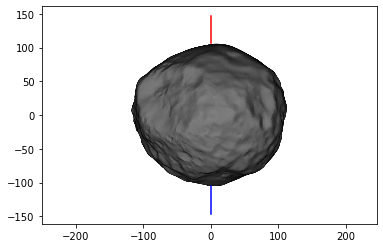

In [69]:
# A simple plot of the shape will show a view from lat=0, lon=0
phoebe.shape.plot()

We can provide the coordinates we want to view the object. Notice the red and blue lines. They show the north and south poles, respectively.

In [70]:
phoebe.shape.plot?

Signature:
phoebe.shape.plot(
    sub_observer='00 00 00 +00 00 00',
    sub_solar=None,
    pole_position_angle=0,
    center_f=0,
    center_g=0,
    scale=1,
    ax=None,
    plot_pole=True,
    **kwargs,
)
Docstring:
Parameters
----------
sub_observer : `astropy.coordinates.SkyCoord`, `str`
    Planetocentric coordinates of the center of the object in the direction of the observer.
    It can be an astropy SkyCoord object or a string with the bodycentric longitude
    latitude in degrees. Ex: "30.0 -20.0", or "30 00 00 -20 00 00".

sub_solar : `astropy.coordinates.SkyCoord`, `str`
    Planetocentric coordinates of the center of the object in the direction of the Sun.
    It can be an astropy SkyCoord object or a string with the bodycentric longitude
    latitude in degrees. Ex: "30.0 -20.0", or "30 00 00 -20 00 00".

pole_position_angle : `float`, `int`
    Body's North Pole position angle with respect to direction of the ICRS
    North Pole, i.e. N-E-S-W.

center_f : `int`, `float

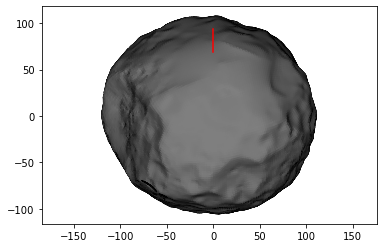

In [71]:
phoebe.shape.plot(sub_observer="30.0 +50.0")

We can also plot the shape as viewed by an observer at a specific time. For this, we must plot the body directly, where the frame attribute will be called to compute the correct orientation.

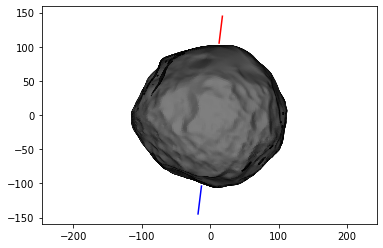

In [72]:
phoebe.plot(time='2022-09-20', observer='geocenter')

To use the 3D shape in the occultation process, we need to be able to get the projected limb of the 3D shape. For that we can use the `get_limb` function in the shape attribute

In [73]:
limb = phoebe.shape.get_limb(sub_observer="30.0 +50.0")

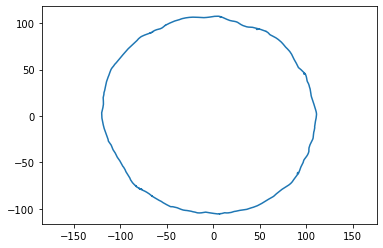

In [74]:
limb.plot()

**To see the use of the shape in an occultation, there is an example in our online documentation showing all the steps.**

**This Jupyter-Notebook was designed as a tutorial for how to work with the** `Body` **and** `Ephemeris` **Classes. More information about the other classes, please refer to their specif Jupyter-Notebook. Any further question, please contact the core team: Altair Ramos Gomes Júnior, Bruno Eduardo Morgado, Gustavo Benedetti Rossi, and Rodrigo Carlos Boufleur.**

**The End**